<a href="https://colab.research.google.com/github/matheus009/pandas/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [3]:
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a    0.151198
b   -0.460973
c   -0.618987
d   -0.260858
e    1.439850
dtype: float64

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1.383256
b   -0.078414
c   -0.461918
d   -0.980837
e    0.334921
dtype: float64


In [5]:
print (s[0])
print("\n")
print (s[:3])

1.3832561944797586


a    1.383256
b   -0.078414
c   -0.461918
dtype: float64


In [6]:
df = pd.DataFrame(s, columns = ['Coluna 1'])
df

,Coluna 1
a,1.383256
b,-0.078414
c,-0.461918
d,-0.980837
e,0.334921


In [7]:
df['Coluna 1']

a    1.383256
b   -0.078414
c   -0.461918
d   -0.980837
e    0.334921
Name: Coluna 1, dtype: float64

In [8]:
df['Coluna 2'] = df['Coluna 1'] * 4
df

,Coluna 1,Coluna 2
a,1.383256,5.533025
b,-0.078414,-0.313656
c,-0.461918,-1.847672
d,-0.980837,-3.923347
e,0.334921,1.339684


In [9]:
df.sort_values(by = 'Coluna 2')

,Coluna 1,Coluna 2
d,-0.980837,-3.923347
c,-0.461918,-1.847672
b,-0.078414,-0.313656
e,0.334921,1.339684
a,1.383256,5.533025


In [10]:
df[df['Coluna 2'] <= 2]

,Coluna 1,Coluna 2
b,-0.078414,-0.313656
c,-0.461918,-1.847672
d,-0.980837,-3.923347
e,0.334921,1.339684


In [11]:
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Coluna 1    0.039402
Coluna 2    0.157607
dtype: float64

In [12]:
table = df.describe()
table

,Coluna 1,Coluna 2
count,5.000000,5.000000
mean,0.039402,0.157607
std,0.894338,3.577354
min,-0.980837,-3.923347
25%,-0.461918,-1.847672
50%,-0.078414,-0.313656
75%,0.334921,1.339684
max,1.383256,5.533025


In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/salgado/lasalle.sad.repo.datas/master/GlobalTemperatures.csv')
df.head(10)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.ix[:,:2]
df.head(10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [16]:
df.describe()


,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


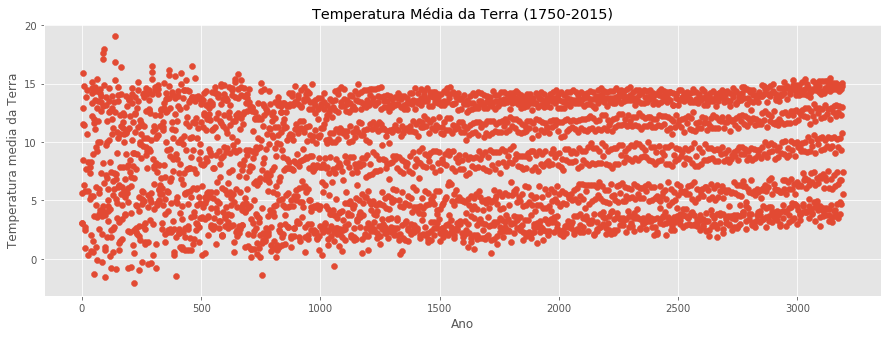

In [17]:
plt.figure(figsize = (15, 5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Temperatura Média da Terra (1750-2015)")
plt.xlabel("Ano")
plt.ylabel("Temperatura media da Terra")
plt.show()

In [18]:
print(type(df['dt'][0]))

<class 'str'>


In [0]:
times = pd.DatetimeIndex(df['dt'])
grouped = df.groupby([times.year]).mean()


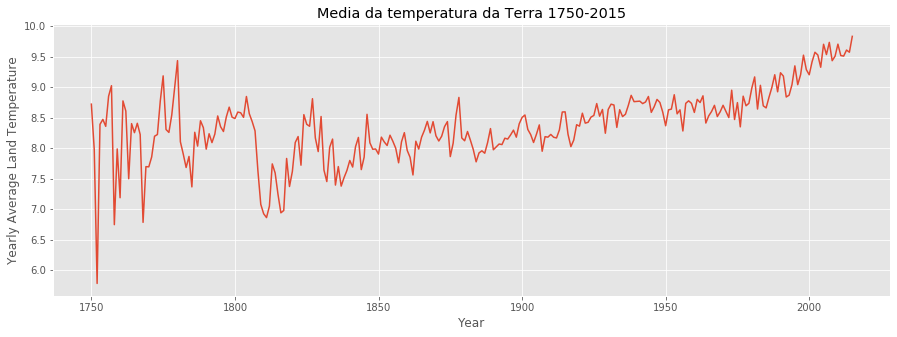

In [21]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Media da temperatura da Terra 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [22]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [23]:
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [24]:
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [0]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

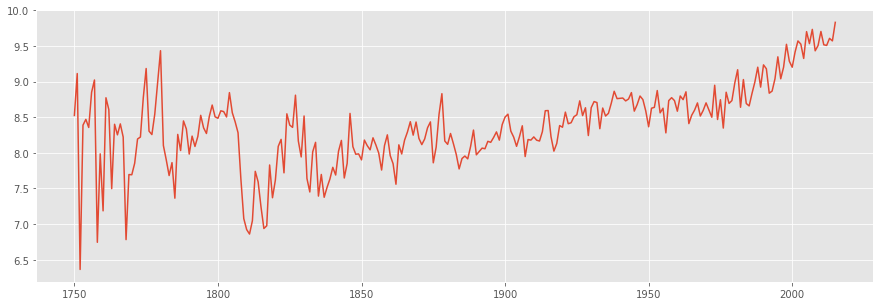

In [26]:

# Regroup and plot
grouped = df.groupby([times.year]).mean()

# Better, but still not perfect
# What are some other ways to fill the NaN values?
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression as LinReg

In [0]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values


In [29]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.3766832275309071


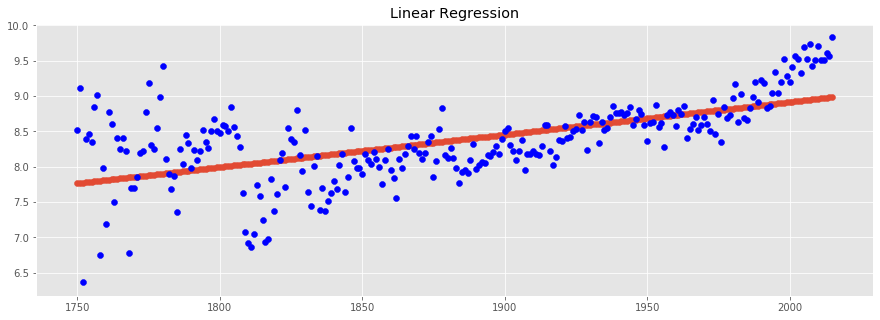

In [30]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")


In [31]:
reg.predict(2000)


ValueError: ignored